In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Colorblind friendly colors
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# PARAMETERS to Change

# Save location
savedir = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Publication Figures\\Publication Figures - 20211212\\Counting_Figure\\Nup96_histogram"

# File path to folder containing csv files with cluster measurements
ddir = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Publication Figures\\Publication Figures - 20211212\\Counting_Figure\\Nup96_histogram"

# base name of files (should all be the same except for the '_#' at the end but don't include that here)
dname = "MATLAB_hist_extraction"

ver = 'V3' #version name for files to not overwrite old ones

# number of files to analyze
fnum = 3
bin_size = 2

# color list -> should be as long as the number of datasets you're analyzing
colors = [CB_color_cycle[0], CB_color_cycle[1], CB_color_cycle[2]]
names = ['Exp. 1', 'Exp. 2', 'Exp. 3']

# Don't touch
cluster_list = []
c_data_all = np.zeros(fnum,dtype=list)
count_max = 0
for a in range(fnum):
    cluster_list.append(ddir+'\\'+dname+'_'+str(int(a+1))+'.csv')
    c_data_all[a] = np.genfromtxt(cluster_list[a],delimiter=',')
    count_max = max(max(c_data_all[a][:,0]),count_max)

In [2]:
# Adjust the data to reflect the desired bin_width
adj_data_x = []
adj_data_n = []
for b in range(fnum):
    adj_data = np.zeros([int((count_max)/bin_size),2])
    counter = 0
    for a in range(int(len(c_data_all[b])/bin_size)):
        adj_data[a,0] = (c_data_all[b][a+counter,0] + c_data_all[b][a+counter+1,0])/2
        adj_data[a,1] = c_data_all[b][a+counter,1] + c_data_all[b][a+counter+1,1]
        counter = counter + bin_size - 1
    adj_data_x.append(adj_data[:,0])
    adj_data_n.append(adj_data[:,1])
    if not adj_data_x[b][-1] == 0:
        avg_data_x = adj_data_x[b]
avg_data_n = np.average(adj_data_n,axis=0)
std_data_n = np.std(avg_data_n,axis=0)

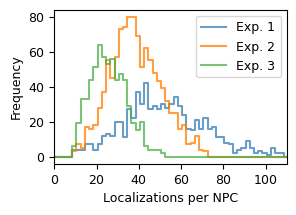

In [11]:
import matplotlib.pyplot as plt
plt.close(fig=None)
plt.rcParams.update({'font.size': 9})
# Average histogram of all experiments
fig = plt.figure(figsize=[3,2])
for c in range(fnum):
    plt.step(avg_data_x, adj_data_n[c], label=names[c], color=colors[c], alpha=0.75)#,yerr=n_std)
    #plt.axvline(x=med_avg, linestyle='--',color='tab:red',alpha=1)
    #plt.text(med_avg+1,np.max(n_avg),str(np.round(med_avg,2)),color='tab:red', fontsize='large')
    plt.xlabel('Localizations per NPC')
    plt.ylabel('Frequency')
    plt.xlim([0,110])
plt.legend()
save_path = savedir + '\\All_NPC_Hists_' + ver + '.png'
plt.savefig(save_path, dpi=600, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0, metadata=None)
plt.show()
plt.close(fig=None)

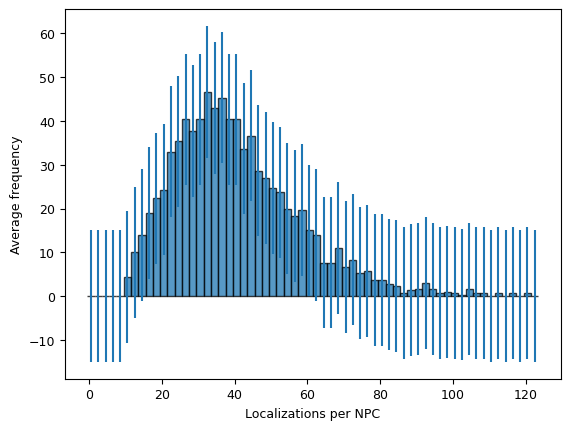

In [4]:
plt.close(fig=None)

plt.bar(avg_data_x, avg_data_n, width=bin_size, label='Average', color='tab:blue', alpha=0.75, edgecolor='k',
        yerr=std_data_n, ecolor='tab:blue')
plt.xlabel('Localizations per NPC')
plt.ylabel('Average frequency')
plt.show()

In [ ]:
plt.close(fig=None)

# Average histogram of all experiments
plt.bar(c_data[:,0], c_data[:,1], width=4, label='Exp 1', color='tab:blue', alpha=0.75, edgecolor = 'k',
        ecolor='tab:blue')#,yerr=n_std)
#plt.axvline(x=med_avg, linestyle='--',color='tab:red',alpha=1)
#plt.text(med_avg+1,np.max(n_avg),str(np.round(med_avg,2)),color='tab:red', fontsize='large')
plt.xlabel('Localizations per NPC')
plt.ylabel('Frequency')
plt.show()

In [ ]:
c_data